In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
def chi_squared_test(x, x_exp, k, x_lower=0, x_upper=1, print_results=True):
    x_obs, bins = np.histogram(x, bins=k, range=(0, k-1))
    x_exp, bins = np.histogram(x_exp, bins=k, range=(0, k-1))
    print(x_obs)
    print(x_exp)
    T = sum([(x_obs[i] - x_exp[i])**2/x_exp[i] if x_exp[i]!=0 else 0.0 for i in range(k)])
    critical_value = stats.chi2.ppf(0.95, k - 1)
    if print_results:
        print('\n--- Chi-Squared test results ---')
        print('T =', T)
        print('critical value =', critical_value)
        print('1 - cdf(T, k-1) =', 1 - stats.chi2.cdf(T, k - 1))
        if stats.chi2.cdf(T, k - 1) < 0.95:
            print('No significant difference detected')
        else:
            print('Significant difference detected!')

**1. Generate simulated values from the following distributions**

**(a) Exponential distribution**

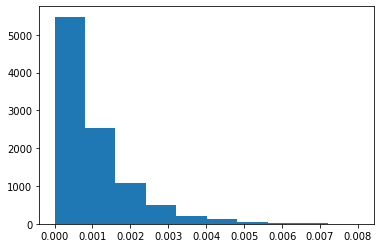

In [3]:
# exponential
x = np.random.uniform(size=10000)
beta = 0.001 #(1/lambda)
y = -beta*np.log(x)
plt.hist(y)
plt.savefig('ex3_exp.png')

In [4]:
beta = 0.001 #(1/lambda)
expected = np.random.exponential(scale=beta, size=10000)
chi_squared_test(y, expected, 10)

[10000     0     0     0     0     0     0     0     0     0]
[10000     0     0     0     0     0     0     0     0     0]

--- Chi-Squared test results ---
T = 0.0
critical value = 16.918977604620448
1 - cdf(T, k-1) = 1.0
No significant difference detected


**(b) Normal distribution (at least with standard Box-Mueller)**

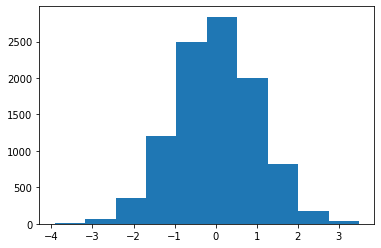

In [5]:
# box-muller for normal distribution
u1s, u2s = np.random.uniform(size=10000), np.random.uniform(size=10000)
ss = -np.log(u1s)
thetas = 2*np.pi*u2s
rs = np.sqrt(2*ss)
xs, ys = rs*np.cos(thetas), rs*np.sin(thetas)

plt.hist(xs, bins=10)
plt.savefig('ex3_norm.png')

In [6]:
expected = np.random.normal(size=10000)
chi_squared_test(xs, expected, 10)

[3165 1515  314   36    0    0    0    0    0    0]
[3219 1476  307   47    2    0    0    0    0    0]

--- Chi-Squared test results ---
T = 6.670436399135614
critical value = 16.918977604620448
1 - cdf(T, k-1) = 0.6713881063957532
No significant difference detected


**(c) Pareto distribution, with β = 1 and experiment with different values of k values: k = 2.05, k = 2.5, k = 3 and k = 4.**

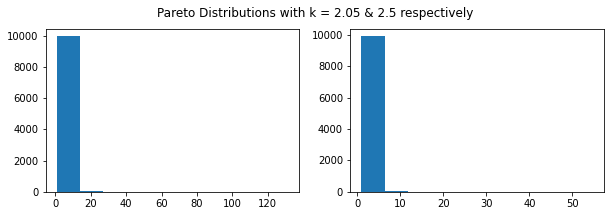

In [7]:
# Pareto
beta = 1
k = [2.05, 2.5, 3, 4]
x = np.random.uniform(size=10000)
y1 = beta / (np.power(1-x, 1/k[0]))
y2 = beta / (np.power(1-x, 1/k[1]))
y3 = beta / (np.power(1-x, 1/k[2]))
y4 = beta / (np.power(1-x, 1/k[3]))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Pareto Distributions with k = 2.05 & 2.5 respectively')
fig.set_size_inches(10, 3)
ax1.hist(y1)
ax2.hist(y2)
plt.savefig('ex3_pareto_1.png')

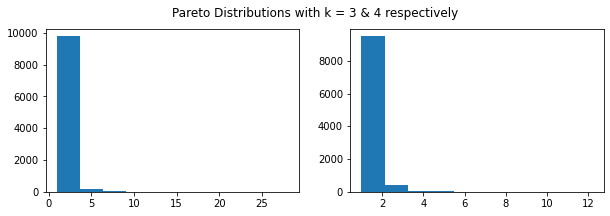

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Pareto Distributions with k = 3 & 4 respectively')
fig.set_size_inches(10, 3)
ax1.hist(y3)
ax2.hist(y4)
plt.savefig('ex3_pareto_2.png')

In [9]:
expected = (np.random.pareto(k[0], 10000) + 1)
chi_squared_test(y1, expected, 10)

expected = (np.random.pareto(k[1], 10000) + 1)
chi_squared_test(y2, expected, 10)

expected = (np.random.pareto(k[2], 10000) + 1)
chi_squared_test(y3, expected, 10)

expected = (np.random.pareto(k[3], 10000) + 1)
chi_squared_test(y4, expected, 10)

[   0 6943 1733  552  296  140   86   53   36   33]
[   0 6935 1711  581  281  150   93   63   38   24]

--- Chi-Squared test results ---
T = 8.801433241217302
critical value = 16.918977604620448
1 - cdf(T, k-1) = 0.45580204963894855
No significant difference detected
[   0 7667 1456  448  176   79   62   30   19   13]
[   0 7690 1497  418  179   84   40   24   15   12]

--- Chi-Squared test results ---
T = 18.442711553916
critical value = 16.918977604620448
1 - cdf(T, k-1) = 0.03037116867099343
Significant difference detected!
[   0 8285 1184  293  111   55   22   16    9    2]
[   0 8238 1232  295  104   37   38   20   11    9]

--- Chi-Squared test results ---
T = 24.72467031706121
critical value = 16.918977604620448
1 - cdf(T, k-1) = 0.0032913295652474694
Significant difference detected!
[   0 9006  782  146   35   14   10    5    1    0]
[   0 9009  807  125   35   12    5    2    2    2]

--- Chi-Squared test results ---
T = 16.636805692448814
critical value = 16.918977604620448


**Verify the results by comparing histograms with analytical
results and perform tests for distribution type.**

**2. For the Pareto distribution with support on [β,∞[ compare
mean value and variance, with analytical results. Explain problems if any.**

In [15]:
# Pareto
beta = 1 #scale
k = 2.05 #shape
x = np.random.uniform(size=10000)
y = beta / (np.power(1-x, 1/k))
mu = np.mean(y)
var = np.var(y)

t_mu = (beta*k) / (k -1)
t_var = (k*np.power(beta,2)) / (np.power(k-1,2)*(k-2))

print(f'Computed mean = {mu} vs. Analytical mean = {t_mu}')
print(f'Computed variance = {var} vs. Analytical variance = {t_var}')

Computed mean = 1.9198026150685448 vs. Analytical mean = 1.9523809523809526
Computed variance = 4.421763226515584 vs. Analytical variance = 37.18820861678019


**3. For the normal distribution generate 100 95% confidence
intervals for the mean and variance, each based on 10
observations. Discuss the results.**

In [ ]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), st.sem(a)
    h = se * st.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [ ]:
means = []
variances = []
cis = []
for i in range(100):
    n = np.random.normal(size=10)
    mean.append(np.mean(n))
    variances.append(np.var(n))
    cis.append(mean_confidence_interval)
